# K-Prototype and K-Modes

## K-Prototype

##### Import Library

##### 1. Lakukan langkah yang sama seperti minggu sebelumnya untuk meng-import library Numpy dan Pandas, numpy, plotnine, module for k-protoype cluster.

In [1]:
# Import module for data manipulation
import pandas as pd

# Import module for linear algebra
import numpy as np

import re

# Import module for data visualization
from plotnine import *
import plotnine

# Import module for k-prototype cluster
from kmodes.kprototypes import KPrototypes

#Import matplotlib
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings('ignore', category= FutureWarning)

C:\Users\Darren\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


In [2]:
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

##### Import Data

#### 2.Gunakan dataset 10000 Sales Records.csv'dan masukkan ke dalam dataframe menggunakan Pandas. Berikan nama df (Petunjuk: gunakan delimiter=; ).

#### 3.Tampilkan informasi dataset dan isi data.

In [3]:
df = pd.read_csv(r'D:\SEMESTER 4\IS411 Data Modelling\LAB\IS411_C-HY_00000054804_Christopher Darren_Week-12\10000 Sales Records.csv', delimiter=',')

In [4]:
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
df.head()

Dimension data: 10000 rows and 14 columns


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.210,524.960,2920025.640,2353920.640,566105.000
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.450,31.790,51008.750,34174.250,16834.500
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.060,90.930,1003700.900,592408.950,411291.950
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.270,502.540,5134318.410,3861014.820,1273303.590
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.450,31.790,165647.950,110978.890,54669.060


#### 4. Inspect the data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


#### 5. Inspect the categorical variables

In [6]:
df.select_dtypes('object').nunique()

Region               7
Country            185
Item Type           12
Sales Channel        2
Order Priority       4
Order Date        2691
Ship Date         2719
dtype: int64

#### 6. Inspect the numerical variables.

In [7]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,549871874.366,5002.856,268.143,188.807,1333355.131,938265.784,395089.347
std,260783511.133,2873.246,217.944,176.446,1465026.174,1145914.069,377554.961
min,100089156.000,2.000,9.330,6.920,167.940,124.560,43.380
25%,321806669.000,2530.750,109.280,56.670,288551.078,164785.530,98329.140
50%,548566305.000,4962.000,205.700,117.110,800051.210,481605.840,289099.020
75%,775998103.500,7472.000,437.200,364.690,1819143.390,1183821.520,566422.708
max,999934232.000,10000.000,668.270,524.960,6680026.920,5241725.600,1738178.390


#### 7. Check missing value.

In [8]:
df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

### Explanatory Data Analysis

#### 8. Distribution of region

In [9]:
df_region = pd.DataFrame(df['Region'].value_counts()).reset_index()
df_region['Percentage'] = df_region['Region'] / df['Region'].value_counts().sum()
df_region.rename(columns= {'index':'Region','Region':'Total'}, inplace=True)
df_region = df_region.sort_values('Total', ascending= True).reset_index(drop= True)
df_region

,Region,Total,Percentage
0,North America,215,0.021
1,Australia and Oceania,797,0.080
2,Central America and the Caribbean,1019,0.102
3,Middle East and North Africa,1264,0.126
4,Asia,1469,0.147
5,Sub-Saharan Africa,2603,0.260
6,Europe,2633,0.263


In [10]:
# The DataFrame
df_region = df.groupby('Region').agg({
    'Region': 'count',
    'Units Sold': 'mean',
    'Total Revenue' : 'mean',
    'Total Cost' : 'mean',
    'Total Profit' : 'mean'
}
).rename(columns= {'Region' : 'Total'}).reset_index().sort_values('Total', ascending = True)

In [11]:
df_region

,Region,Total,Units Sold,Total Revenue,Total Cost,Total Profit
5,North America,215,5373.358,1559778.805,1097008.967,462769.838
1,Australia and Oceania,797,4986.769,1317192.267,910578.451,406613.816
2,Central America and the Caribbean,1019,5081.063,1369509.041,973672.093,395836.948
4,Middle East and North Africa,1264,5116.219,1357304.982,953884.180,403420.803
0,Asia,1469,5015.488,1365082.080,965215.983,399866.097
6,Sub-Saharan Africa,2603,4967.808,1287190.079,903155.468,384034.611
3,Europe,2633,4920.385,1322207.396,932158.169,390049.226


#### 9. Data Visualization

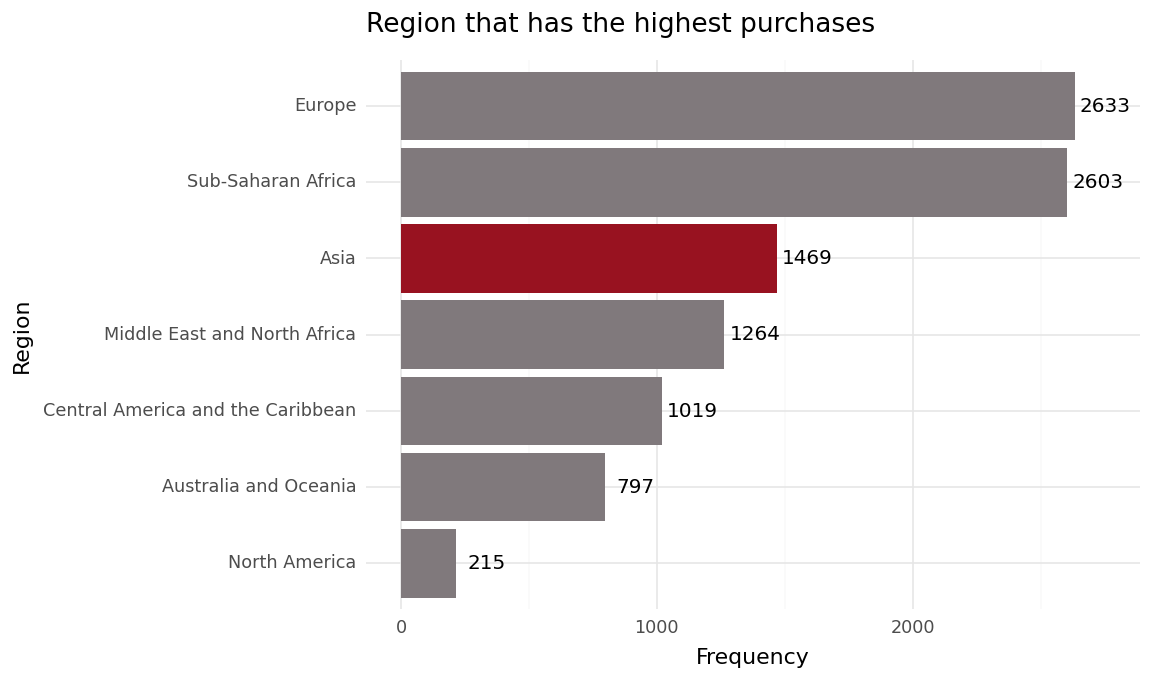

<Figure Size: (576 x 345)>

In [12]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data= df_region)+
    geom_bar(aes(x = 'Region',
                y = 'Total'), fill = np.where(df_region['Region'] == 'Asia' ,'#981220','#80797c'),
                stat = 'identity')+
                geom_text(aes(x ='Region',
                            y = 'Total',
                            label = 'Total'),
                            size = 10,
                            nudge_y = 120)+
                        labs(title='Region that has the highest purchases')+
                        xlab('Region')+
                        ylab('Frequency')+
                        scale_x_discrete(limits = df_region['Region'].tolist())+
                        theme_minimal()+
                        coord_flip()
)

#### 10. Distribution of item type

In [13]:
# Order the index of cross tabulation
order_region = df_region['Region'].to_list()
order_region.append('All')
order_region

['North America',
 'Australia and Oceania',
 'Central America and the Caribbean',
 'Middle East and North Africa',
 'Asia',
 'Sub-Saharan Africa',
 'Europe',
 'All']

In [14]:
df_item = pd.crosstab(df['Region'], df['Item Type'], margins= True).reindex(order_region, axis = 0).reset_index()
#remove index name
df_item.columns.name = None
df_item

,Region,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables,All
0,North America,21,20,16,21,20,15,20,17,20,17,16,12,215
1,Australia and Oceania,65,50,69,77,75,55,78,61,50,76,72,69,797
2,Central America and the Caribbean,74,92,77,84,77,81,104,75,94,82,89,90,1019
3,Middle East and North Africa,105,96,104,111,99,104,128,101,103,112,95,106,1264
4,Asia,132,108,121,116,125,111,116,114,132,137,120,137,1469
5,Sub-Saharan Africa,235,220,211,229,203,230,218,207,207,223,221,199,2603
6,Europe,210,196,227,234,235,199,211,223,231,241,203,223,2633
7,All,842,782,825,872,834,795,875,798,837,888,816,836,10000


### Data Pre-processing

#### 11. Data pre-processing

In [15]:
df.drop(['Country','Order Date','Order ID','Ship Date'], axis = 1, inplace= True)

In [16]:
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
df.head()

Dimension data: 10000 rows and 10 columns


,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Office Supplies,Online,L,4484,651.210,524.960,2920025.640,2353920.640,566105.000
1,Europe,Beverages,Online,C,1075,47.450,31.790,51008.750,34174.250,16834.500
2,Middle East and North Africa,Vegetables,Offline,C,6515,154.060,90.930,1003700.900,592408.950,411291.950
3,Sub-Saharan Africa,Household,Online,C,7683,668.270,502.540,5134318.410,3861014.820,1273303.590
4,Europe,Beverages,Online,C,3491,47.450,31.790,165647.950,110978.890,54669.060


### Cluster Analysis

#### 12. Get the position of categorical colums

In [17]:
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns              : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position     : {}'.format(catColumnsPos))

Categorical columns              : ['Region', 'Item Type', 'Sales Channel', 'Order Priority']
Categorical columns position     : [0, 1, 2, 3]


#### 13. Convert dataframe to matrix

In [18]:
dfMatrix = df.to_numpy()

In [19]:
dfMatrix

array([['Sub-Saharan Africa', 'Office Supplies', 'Online', ...,
        2920025.64, 2353920.64, 566105.0],
       ['Europe', 'Beverages', 'Online', ..., 51008.75, 34174.25,
        16834.5],
       ['Middle East and North Africa', 'Vegetables', 'Offline', ...,
        1003700.9, 592408.95, 411291.95],
       ...,
       ['Sub-Saharan Africa', 'Vegetables', 'Offline', ..., 388847.44,
        229507.32, 159340.12],
       ['Sub-Saharan Africa', 'Meat', 'Online', ..., 3672974.34,
        3174991.14, 497983.2],
       ['Asia', 'Snacks', 'Offline', ..., 55081.38, 35175.84, 19905.54]],
      dtype=object)

#### 14. Choose optima K using Elbow method

In [20]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs= -1, n_clusters = cluster, init= 'Huang', random_state= 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


In [21]:
#Converting the result into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1,6), 'Cost':cost})
df_cost.head()

,Cluster,Cost
0,1,36016173492135216.000
1,2,9627986092172950.000
2,3,4960707512782198.000
3,4,2927457054391281.500
4,5,1975342819318915.500


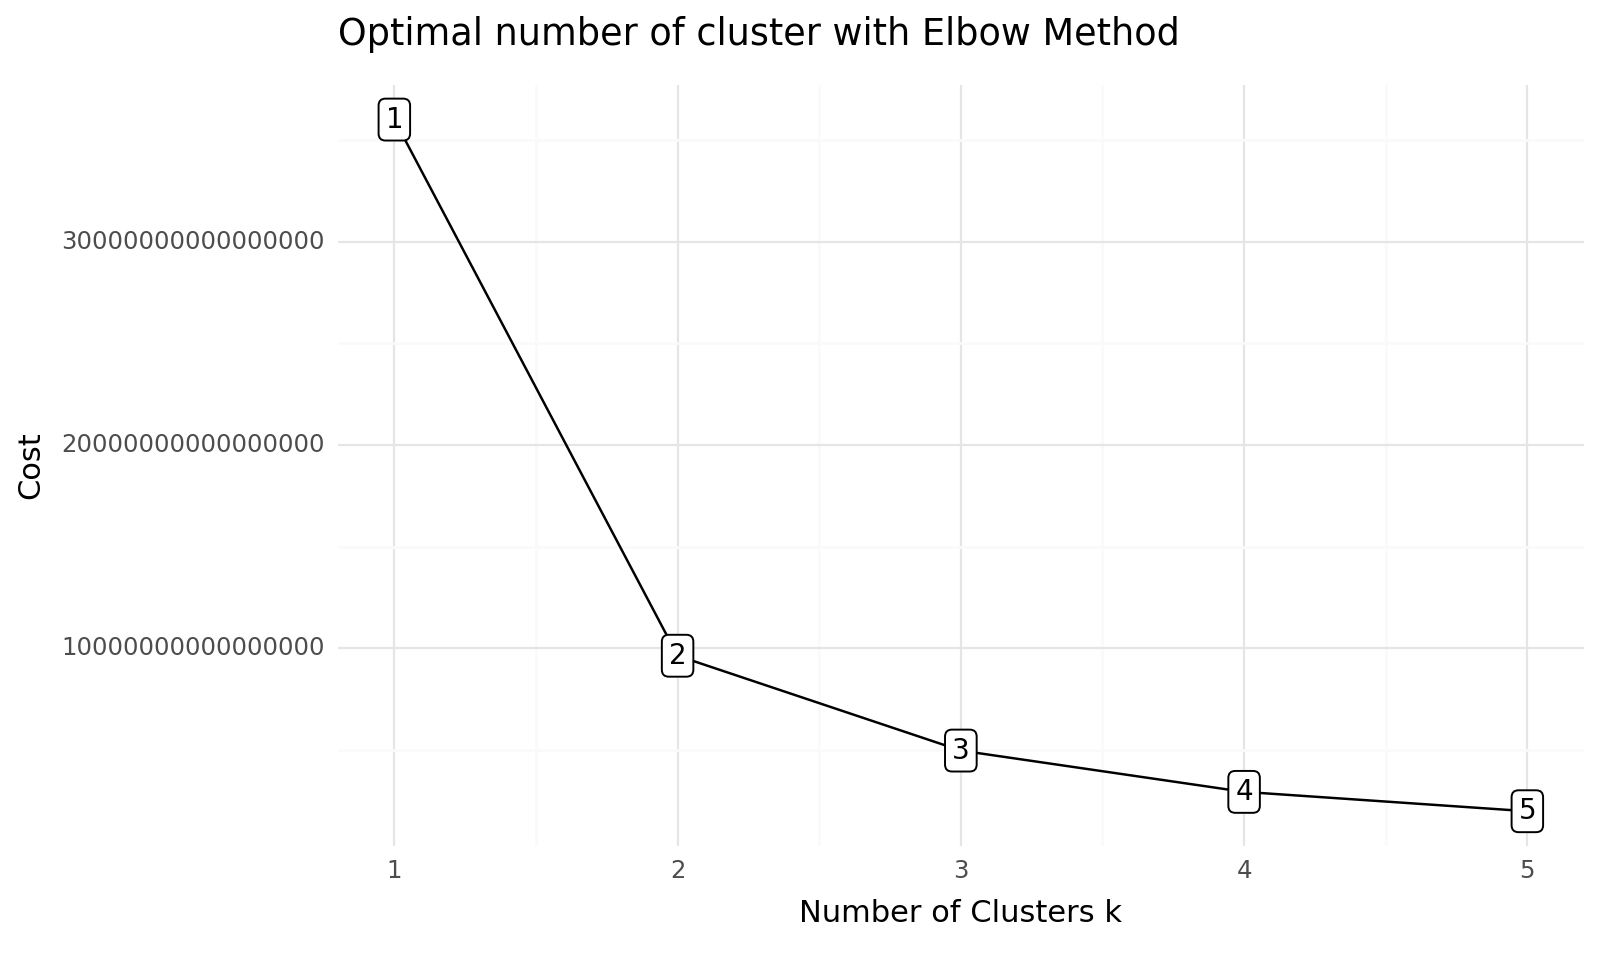

<Figure Size: (800 x 480)>

In [22]:
# Data Visualization
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data=df_cost)+
    geom_line(aes(x ='Cluster',
                y = 'Cost'))+
    geom_point(aes(x ='Cluster',
                y ='Cost'))+
    geom_label(aes(x ='Cluster',
                y = 'Cost',
                label = 'Cluster'),
                size = 10,
                nudge_y = 1000)+
            labs(title = 'Optimal number of cluster with Elbow Method')+
            xlab('Number of Clusters k')+
            ylab('Cost')+
            theme_minimal()
)

##### jumlah cluster k = 3. Ini akan menjadi jumlah cluster yang optimal untuk analisis cluster K-Prototype.

#### 15. Fit the cluster

In [23]:
# Fit the cluster
kprototype = KPrototypes(n_jobs= -1, n_clusters= 3, init = 'Huang',random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([2, 1, 1, ..., 1, 0, 1], dtype=uint16)

#### 16. Cluster centroid

In [24]:
kprototype.cluster_centroids_

array([['7904.365546218487', '593.5265126050487', '457.7854957983237',
        '4622760.54755461', '3559121.123487404', '1063639.4240672272',
        'Europe', 'Household', 'Offline', 'L'],
       ['4046.6694875411376', '163.25910672308268', '105.79686882933876',
        '467709.4517003616', '281142.9546497418', '186566.49705061852',
        'Sub-Saharan Africa', 'Personal Care', 'Online', 'C'],
       ['6093.2754219843555', '384.2645039110733', '275.09750102922703',
        '1995888.1232729503', '1380539.5273034165', '615348.5959695351',
        'Europe', 'Cosmetics', 'Online', 'H']], dtype='<U32')

#### 17. Check the iteration of the clusters created

In [25]:
# Check the iteration of the clusters created
kprototype.n_iter_

7

#### 18. Check the cost of the clusters created

In [26]:
# Check the cost of the clusters created
kprototype.cost_

4960707512782198.0

#### 19. Add the cluster to the dataframe

In [27]:
# Add the cluster to the dataframe
df['cluster_id'] = kprototype.labels_

In [28]:
df_region = pd.DataFrame(df['Region'].value_counts()).reset_index()
df_region['Percentage'] = df_region['Region'] / df['Region'].value_counts().sum()
df_region.rename(columns = {'index':'Region','Region':'Total'}, inplace = True)
df_region = df_region.sort_values('Total', ascending = True).reset_index(drop= True)
df_region

,Region,Total,Percentage
0,North America,215,0.021
1,Australia and Oceania,797,0.080
2,Central America and the Caribbean,1019,0.102
3,Middle East and North Africa,1264,0.126
4,Asia,1469,0.147
5,Sub-Saharan Africa,2603,0.260
6,Europe,2633,0.263


In [29]:
# Add the cluster to the dataframe
df['Cluster Labels'] = kprototype.labels_
df['Segment'] = df['Cluster Labels'].map({0:'First', 1:'Second',2:'Third'})

#Order the cluster
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['First','Second','Third'])
df.head()

,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,cluster_id,Cluster Labels,Segment
0,Sub-Saharan Africa,Office Supplies,Online,L,4484,651.210,524.960,2920025.640,2353920.640,566105.000,2,2,Third
1,Europe,Beverages,Online,C,1075,47.450,31.790,51008.750,34174.250,16834.500,1,1,Second
2,Middle East and North Africa,Vegetables,Offline,C,6515,154.060,90.930,1003700.900,592408.950,411291.950,1,1,Second
3,Sub-Saharan Africa,Household,Online,C,7683,668.270,502.540,5134318.410,3861014.820,1273303.590,0,0,First
4,Europe,Beverages,Online,C,3491,47.450,31.790,165647.950,110978.890,54669.060,1,1,Second


#### 20. Cluster interpretation

In [30]:
df.rename(columns= {'Cluster Labels' :'Total'}, inplace= True)
df.groupby('Segment').agg(
    {
        'Total':'count',
        'Region': lambda x: x.value_counts().index[0],
        'Item Type': lambda x: x.value_counts().index[0],
        'Sales Channel': lambda x: x.value_counts().index[0],
        'Order Priority': lambda x: x.value_counts().index[0],
        'Units Sold': 'mean',
        'Unit Price': 'mean',
        'Total Revenue': 'mean',
        'Total Cost': 'mean',
        'Total Profit':'mean'
    }
).reset_index()

,Segment,Total,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Total Revenue,Total Cost,Total Profit
0,First,1190,Europe,Household,Offline,L,7904.366,593.527,4622760.548,3559121.123,1063639.424
1,Second,6381,Sub-Saharan Africa,Personal Care,Online,C,4046.669,163.259,467709.452,281142.955,186566.497
2,Third,2429,Europe,Cosmetics,Online,H,6093.275,384.265,1995888.123,1380539.527,615348.596


## K-Modes Clustering

#### 1.Import Library

In [31]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt

#### 2. gunakan dataset dummy dan lihat hasilnya

In [32]:
data = pd.read_csv(r'D:\SEMESTER 4\IS411 Data Modelling\LAB\IS411_C-HY_00000054804_Christopher Darren_Week-12\data.csv')
data

,Individual,Skill
0,1,C
1,1,Python
2,1,Java
3,1,Haskell
4,2,Python
5,2,React
6,2,JS
7,2,PHP
8,3,C++
9,3,JS


#### 3. Kita akan memberikan tanda kepada individual yang memiliki skill dengan cara :

In [33]:
one_hot_df = data.copy()
for i, name in enumerate(data['Skill'].unique()):
    one_hot_df[name] = 0
def set_product(x):
    x[str(x['Skill'])] = 1
    return x

one_hot_df = one_hot_df.apply(set_product, axis=1)
one_hot_df = one_hot_df.groupby(['Individual']).sum()
one_hot_df

,C,Python,Java,Haskell,React,JS,PHP,C++,Flutter,Android,iOS,Fortran,Pascal,.NET,C#,MATLAB
Individual,,,,,,,,,,,,,,,,
1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


#### 4. Lalu kita coba menggunakan 3 culster dengan initial Huang untuk memprediksi mendapat K-Modes

In [34]:
from kmodes.kmodes import KModes
# define the k-modes model
km = KModes(n_clusters=3, init ='Huang', n_init=4, verbose=1)
# fit the clustrs to the skills dataframe

cluster = km.fit_predict(one_hot_df)
# get an array of cluster modes
kmodes = km.cluster_centroids_
shape = kmodes.shape
# For each cluster mode ( a vector of "1" and "0")
# find and print the coumn headings where "1" appears.
# If no "1" appears, assign to "no-styles" cluster.
for i in range(shape[0]):
    if sum(kmodes[1,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no style cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in one_hot_df.columns[np.nonzero(cent)]:
            print(j)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6.0
Best run was number 1

cluster 0: 
C
Fortran
Pascal
.NET
C#
MATLAB

cluster 1: 
Python

cluster 2: 
JS
C++
Flutter
Android
iOS
